In [1]:
from collections import Counter
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
file= "alldata.csv"

In [2]:
df = pd.read_csv(file)

In [3]:
df=df.dropna(how='all')

In [4]:
# droppping reviews column
del df['reviews']
# del df['description']

In [5]:
#sorting out location
df['location2'] = df['location'].str.replace(r'\d+','')
df['location2'] = df['location2'].str.strip()
# df

In [6]:
# running our 'query' through the position column, marking found words as true
try:
  df = df.rename(columns={"positiontxt":"position"})
  df['position'] = df[df['position'].str.contains('data|science|database|analytics|statistician|machine learning|business intelligence',
                                                  flags=re.IGNORECASE, regex=True)]

except AttributeError:
  print("stupid error makes no sense")


# df.count()


In [7]:
df['position']
df = df.dropna(how='any')
# df['position']

In [8]:
newdf = df[['company', 'position']].copy()
newdf['Counts'] = df.groupby(['company'])['position'].transform('count')

newdfclean = newdf.drop(newdf[newdf.Counts < 33].index)
newdfclean
newdfclean.loc[df.position.str.contains('analyst', case=False), 'Job Type'] = 'Analyst'
newdfclean.loc[df.position.str.contains('analysis', case=False), 'Job Type'] = 'Analyst'
newdfclean.loc[df.position.str.contains('analytics', case=False), 'Job Type'] = 'Analyst'
newdfclean.loc[df.position.str.contains('machine learning', case=False), 'Job Type'] = 'Machine Learning'
newdfclean.loc[df.position.str.contains('engineering', case=False), 'Job Type'] = 'Engineer'
newdfclean.loc[df.position.str.contains('engineer', case=False), 'Job Type'] = 'Engineer'
newdfclean.loc[df.position.str.contains('data science', case=False), 'Job Type'] = 'Data Scientist'
newdfclean.loc[df.position.str.contains('data scientist', case=False), 'Job Type'] = 'Data Scientist'
newdfclean.loc[df.position.str.contains('applied scientist', case=False), 'Job Type'] = 'Data Scientist'
newdfclean.loc[df.position.str.contains('applied science', case=False), 'Job Type'] = 'Data Scientist'
newdfclean.loc[df.position.str.contains('sales', case=False), 'Job Type'] = 'Business Intelligence'
newdfclean.loc[df.position.str.contains('business intelligence', case=False), 'Job Type'] = 'Business Intelligence'

newdfclean.sort_values('Counts', ascending=False)
# newdfclean.Counts.unique()


,company,position,Counts,Job Type
3877,Amazon.com,Sr. Data Engineer,157,Engineer
4979,Amazon.com,"Data Scientist, Alexa Shopping NLU",157,Data Scientist
5643,Amazon.com,Applied Science Manager - Deep Learning,157,Data Scientist
5641,Amazon.com,"Science Manager, Alexa Machine Learning",157,Machine Learning
5638,Amazon.com,Sr Machine Learning Scientist - Prime Video Re...,157,Machine Learning
5627,Amazon.com,"Sr. Machine Learning Scientist, Amazon Alexa",157,Machine Learning
5623,Amazon.com,"Data Engineering Manager, Amazon Go",157,Engineer
5620,Amazon.com,Senior Data Engineer,157,Engineer
5615,Amazon.com,Sr Machine Learning Scientist - Prime Video Re...,157,Machine Learning
4947,Amazon.com,Machine Learning Scientist,157,Machine Learning


In [9]:
print(plt.style.available)



['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


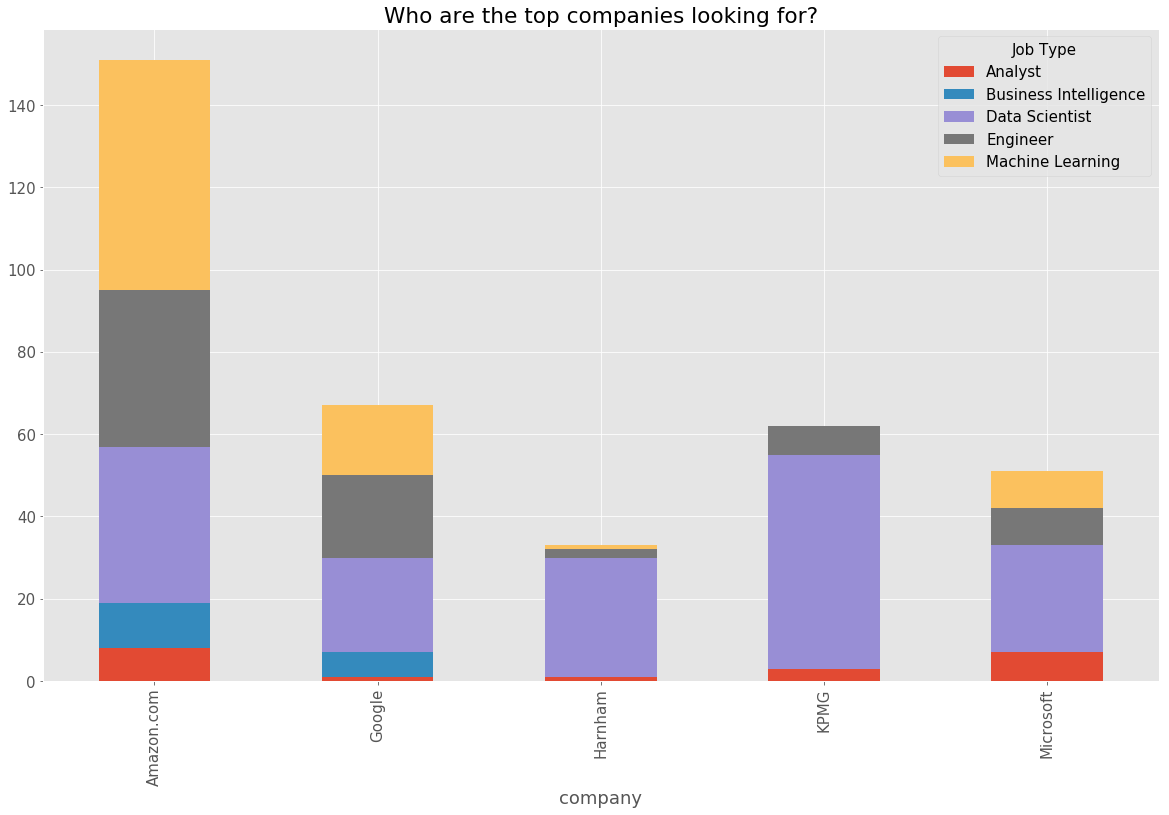

In [10]:

# newdfclean.groupby(['company', 'jobtype']).size().unstack().plot(kind='bar', stacked=True, 
#                 figsize=(20,10),title="Positions requested from Top Companies")

plt.style.use('ggplot')
plt.rcParams.update({'font.size': 15})
plt.cm.BuPu(np.linspace(0, 0.5))
bplot= newdfclean.groupby(['company', 'Job Type']).size().unstack()


bplot.plot(kind='bar',stacked=True, figsize=(20,12), title="Who are the top companies looking for?")

plt.savefig('topcompanyjobs.png')

In [11]:
# aesthetics cover for our powerpoint presentation

# from wordcloud import WordCloud, STOPWORDS
# import matplotlib.pyplot as plt
# text = df.position.values
# wordcloud = WordCloud(
#     width = 4000,
#     height = 3000,
#     background_color = 'black',
#     stopwords = STOPWORDS).generate(str(text))
# fig = plt.figure(
#     figsize = (40, 30),
#     facecolor = 'k',
#     edgecolor = 'k')
# plt.imshow(wordcloud, interpolation = 'bilinear')
# plt.axis('off')
# plt.tight_layout(pad=0)
# plt.savefig('powerpointcover.png')

In [12]:
#Get the state
state = df["location2"].str.split(",", n = 1, expand = True)
df['state'] = state[1]
df.head()

,position,company,description,location,location2,state
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...","Atlanta, GA","Atlanta, GA",GA
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,"Atlanta, GA 30303","Atlanta, GA",GA
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,"Atlanta, GA","Atlanta, GA",GA
5,Manager of Data Engineering,McKinsey & Company,Qualifications\nBachelor’s degree in Computer ...,"Atlanta, GA 30318","Atlanta, GA",GA
9,Senior Associate - Cognitive Data Scientist Na...,KPMG,Known for being a great place to work and buil...,"Atlanta, GA 30338","Atlanta, GA",GA


In [13]:
#Dependencies to use the Google API for heatmaps
import requests
import json
import gmaps
from config import gkey
gmaps.configure(api_key=gkey)

In [14]:
#Create a new df with only the distinct locations and include a column for longitude and latitude
distinct_locations_df = df[["location2","state"]]
distinct_locations_df["longitude"]=""
distinct_locations_df["latitude"]=""
distinct_locations_df = distinct_locations_df.drop_duplicates(keep='first', inplace=False)
distinct_locations_df

/Users/lauren/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/lauren/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,location2,state,longitude,latitude
2,"Atlanta, GA",GA,,
270,"Austin, TX",TX,,
281,"Round Rock, TX",TX,,
493,"Boulder, CO",CO,,
744,"Boston, MA",MA,,
1371,"Chicago, IL",IL,,
1842,"Washington, DC",DC,,
2189,"Los Angeles, CA",CA,,
2438,"Cambridge, MA",MA,,
3131,"Mountain View, CA",CA,,


In [15]:
#Iterate through the distinct locations dataframe and get the longitude and latitude
#After getting the long and lat, add to the DF
for index, row in distinct_locations_df.iterrows():
    target_city = row["location2"]
    # Build the endpoint URL
    target_url = ('https://maps.googleapis.com/maps/api/geocode/json?'
    'address={0}&key={1}').format(target_city, gkey)
    geo_data = requests.get(target_url).json()
    try:
        distinct_locations_df.loc[index, 'longitude'] = geo_data["results"][0]["geometry"]["location"]["lat"]
        distinct_locations_df.loc[index, 'latitude'] = geo_data["results"][0]["geometry"]["location"]["lng"]
        
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")

In [16]:
#Set the location2 column as the index 
distinct_locations_df = distinct_locations_df.set_index("location2")

In [17]:
#Get the number of times a location popped up (using the original dataframe)
weights_group = df.groupby(["location2"])
weights = weights_group["location2"].count()

#Create a new column in the distinct locations dataframe for number of instances
distinct_locations_df["Number of Job Postings"] = weights
distinct_locations_df

,state,longitude,latitude,Number of Job Postings
location2,,,,
"Atlanta, GA",GA,33.749,-84.388,108
"Austin, TX",TX,30.2672,-97.7431,80
"Round Rock, TX",TX,30.5083,-97.6789,3
"Boulder, CO",CO,40.015,-105.271,25
"Boston, MA",MA,42.3601,-71.0589,227
"Chicago, IL",IL,41.8781,-87.6298,204
"Washington, DC",DC,38.9072,-77.0369,120
"Los Angeles, CA",CA,34.0522,-118.244,74
"Cambridge, MA",MA,42.3736,-71.1097,134


In [18]:
# Store latitude and longitude in locations
locations = distinct_locations_df[["longitude","latitude"]]

# Convert the Number of Instances column to float so that it can be used as weights in the DF
weights = distinct_locations_df["Number of Job Postings"].astype(float)

In [39]:
# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights = weights,
                                 dissipating=False, max_intensity=10,
                                 point_radius=1)

# Add layer
fig.add_layer(heat_layer)

#save fig 
plt.savefig('heatmap.png')

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

<Figure size 432x288 with 0 Axes>

In [28]:
#Group the data by state and get postings by state
state_groups = distinct_locations_df.groupby(["state"])
total_listings = state_groups.sum()
total_listings= total_listings.reset_index()
total_listings = total_listings.sort_values("Number of Job Postings", ascending = False)
total_listings

,state,Number of Job Postings
0,CA,909
7,NY,534
5,MA,361
9,WA,358
4,IL,204
2,DC,120
3,GA,108
8,TX,83
6,NJ,37
1,CO,25


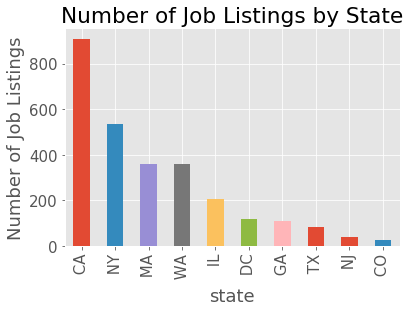

In [41]:
#Create a bar chart
import matplotlib.pyplot as plt

total_listings.plot.bar(x="state", y="Number of Job Postings", 
                        title = "Number of Job Listings by State", align="center",legend=False)
plt.ylabel("Number of Job Listings")

#Show and save chart
plt.savefig('joblistingsbystatebarchart.png', bbox_inches = 'tight')